In [42]:
import csv
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
from nltk.tokenize.treebank import TreebankWordDetokenizer
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

In [31]:
Conversas_list = []
with open("Conversas_2018-10-01.csv") as file:
    reader = csv.reader(file)
    for row in reader:
        if row[2]=="USER":
            Conversas_list.append(row[4])

with open("Conversas_2018-10-03.csv") as file:
    reader = csv.reader(file)
    for row in reader:
        if row[2]=="USER":
            Conversas_list.append(row[4])


Conversas_array = np.asarray(Conversas_list)

26508

In [43]:
from nltk.corpus import stopwords
from string import punctuation
nlp = spacy.load('pt')
stemmer = nltk.stem.RSLPStemmer()
filtered_msg =[]
X_train = []
stopwords = set(stopwords.words('portuguese') + list(punctuation))

for msg in Conversas_array:
    doc = nlp(str(msg))
    tokens = [token for token in doc]
    filtered_tokens = [token.lemma_ for token in tokens if not token in stopwords]
    X_train.append(TreebankWordDetokenizer().detokenize(filtered_tokens))
    

'''
with open("Conversas_2018-10-01.csv") as file:
    reader = csv.reader(file)
    for row in reader:
        if row[2]=="USER":
            doc = nlp(row[4])
            tokens = [token for token in doc]
            filtered_tokens = [token.lemma_ for token in tokens if not token in stopwords]
            X_train.append(TreebankWordDetokenizer().detokenize(filtered_tokens))
'''            
X_train = np.asarray(X_train)

In [46]:

count_vect = CountVectorizer(stop_words=stopwords)
tfidf_transformer = TfidfTransformer()

bag = count_vect.fit_transform(X_train)
bag_tfidf = tfidf_transformer.fit_transform(bag)
#bag_array=bag_tfidf.toarray()



k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14
k = 15
k = 16
k = 17
k = 18
k = 19
k = 20
k = 21
k = 22
k = 23
k = 24
k = 25
k = 26
k = 27
k = 28
k = 29
k = 30
k = 31
k = 32
k = 33
k = 34
k = 35
k = 36
k = 37
k = 38
k = 39
k = 40
k = 41
k = 42
k = 43
k = 44
k = 45
k = 46
k = 47
k = 48
k = 49
k = 50
k = 51
k = 52
k = 53
k = 54
k = 55
k = 56
k = 57
k = 58
k = 59
k = 60
k = 61
k = 62
k = 63
k = 64
k = 65
k = 66
k = 67
k = 68
k = 69
k = 70
k = 71
k = 72
k = 73
k = 74
k = 75
k = 76
k = 77
k = 78
k = 79
k = 80
k = 81
k = 82
k = 83
k = 84
k = 85
k = 86
k = 87
k = 88
k = 89
k = 90
k = 91
k = 92
k = 93
k = 94
k = 95
k = 96
k = 97
k = 98
k = 99
k = 100
k = 101
k = 102
k = 103
k = 104
k = 105
k = 106
k = 107
k = 108
k = 109
k = 110
k = 111
k = 112
k = 113
k = 114
k = 115
k = 116
k = 117
k = 118
k = 119
k = 120
k = 121
k = 122
k = 123
k = 124
k = 125
k = 126
k = 127
k = 128
k = 129
k = 130
k = 131
k = 132
k = 133
k = 134
k = 135
k = 136
k = 137
k = 138
k = 139
k 

Text(0,0.5,'Average Silhouette')

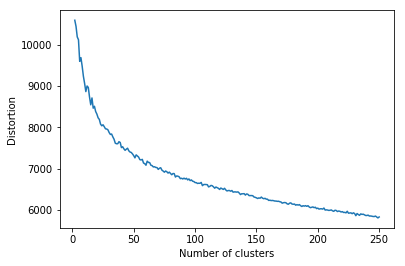

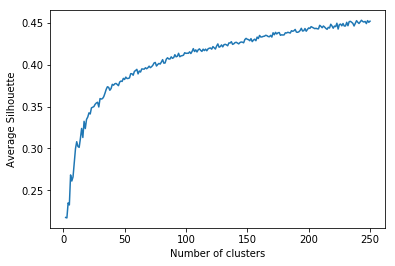

In [35]:
%matplotlib notebook 
distortion = []
score = []
K =[]
silhouette_avg = []
for k in range(2, 251):
    print('k = %d' %k)
    kmeans = KMeans(n_clusters=k, algorithm = "full").fit(bag_tfidf)
    silhouette_avg.append(silhouette_score(bag_tfidf, kmeans.predict(bag_tfidf)))
    #kmeans = MiniBatchKMeans(n_clusters=k, init='k-means++', batch_size = 5000).fit(bag_array)
    distortion.append(kmeans.inertia_) # Inertia: Sum of distances of samples to their closest cluster center
    K.append(k)
plt.figure()
plt.plot(K, distortion)
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")

plt.figure()
plt.plot(K, silhouette_avg)
plt.xlabel("Number of clusters")
plt.ylabel("Average Silhouette")

Text(0,0.5,'Distortion')

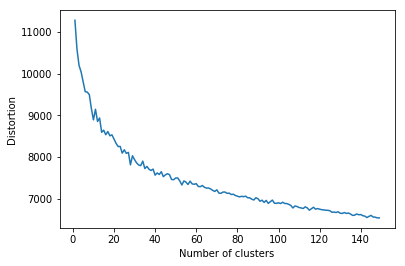

In [27]:
%matplotlib notebook 
plt.figure()
plt.plot(K[0:150], distortion[0:150])
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")

In [47]:
from sklearn.cluster import KMeans
# Number of clusters
kmeans = KMeans(n_clusters=40)
# Fitting the input data
kmeans = kmeans.fit(bag_tfidf)
# Getting the cluster labels
labels = kmeans.predict(bag_tfidf)
# Centroid values

centroids = kmeans.cluster_centers_

In [49]:
save_path = "intents_classificadas.csv"
save_array = []
number_clusters = 40
with open(save_path, "w") as save_file:
    writer = csv.writer(save_file, delimiter = '\t')
    for ordered_label in range(0, number_clusters+1):
        print(ordered_label)
        for index, label in enumerate(labels):
            if (ordered_label == label):
                writer.writerow([Conversas_array[index], ordered_label])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
